<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW2_GD_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (pro)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание - 10.

## Часть 1 (теоретическая)

## Задание 1 (**1.5 балла**)

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

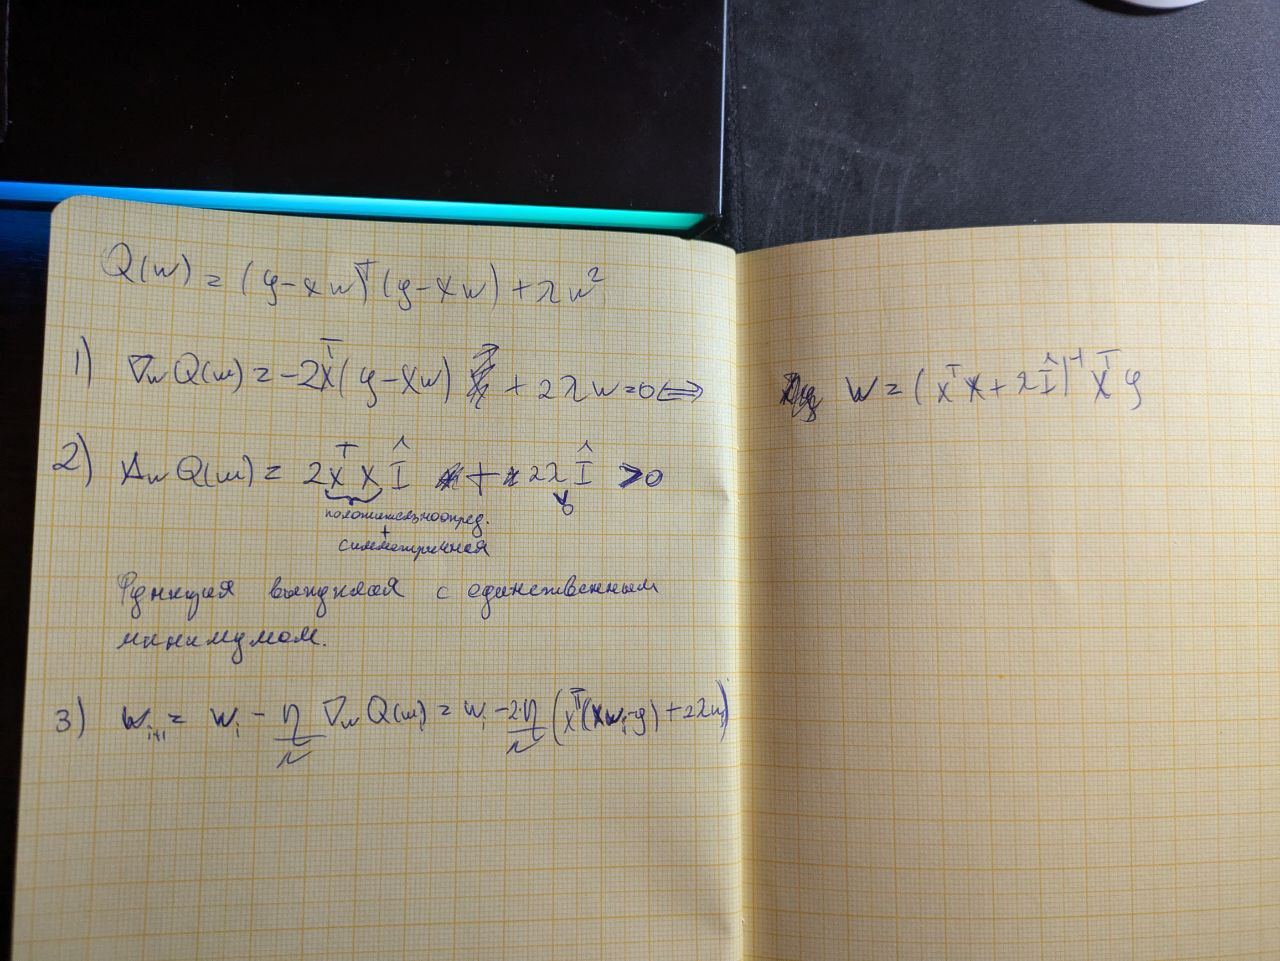


## Часть 2 (практическая).

## Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [ ] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [ ] Задайте стартовые точки x0, равные 0, 0.5, 1
- [ ] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [ ] Проанализируйте результаты. Предположите, с чем они связаны. Ответьте на вопросы:
    - Чему равны значения экстремумов?
    - При старте из какой начальной точки найденные экстремумы совпадут?




In [1]:
import numpy as np

# Функция и её производная
def f(x):

  """Ваш код здесь"""

  return x * np.sin(5*x) + 0.1*x**2

def df(x):

    """Ваш код здесь"""
    return np.sin(5*x) + 0.2*x + 5*x*np.cos(5*x)

# Градиентный спуск
def gradient_descent(f, df, x0, eta, maximize=False, max_iter=1000, tol=1e-6):

    """Ваш код здесь"""
    path = [[f(x0), x0]]
    iter = 0
    error = np.inf
    maximize = 2*int(maximize) - 1
    while iter < max_iter and error > tol:
        x = x0 + maximize * eta * df(x0)
        path += [[f(x), x]]
        iter += 1
        error = np.abs(x - x0)
        x0 = x
    return x, path

# Поиск экстремумов
def find_points(f, df, eta, max_iter=1000, tol=1e-6):

    """Ваш код здесь"""
    paths = []
    xs = []
    conds = []
    for x0 in [0, 0.5, 1]:
        for maximize in [False, True]:
            x, path = gradient_descent(f, df, x0, eta, maximize, max_iter=max_iter, tol=tol)
            xs += [x]
            paths += [path]
            conds += [{'x0': x0, 'maximize': maximize}]
    return xs, paths, conds

In [2]:
xs, paths, conds = find_points(f, df, 0.01, max_iter=100)

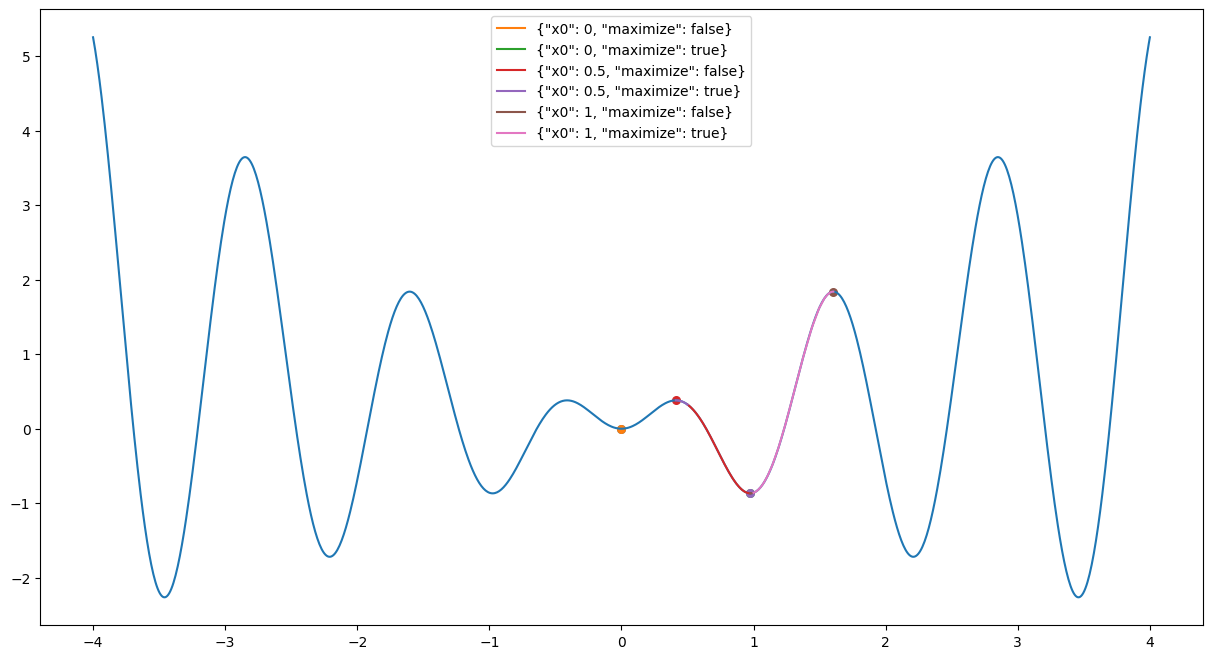

In [3]:
import matplotlib.pyplot as plt
import json

plt.figure(figsize=(15, 8))

xrange = np.linspace(-4, 4, 1000)
plt.plot(xrange, f(xrange))

for x, path, cond in zip(xs, paths, conds):
    plt.plot(*list(zip(*path))[::-1], label=json.dumps(cond))
    plt.scatter(x, f(x), s=30)

plt.legend()
plt.show()

## Задание 3 (**0.5 балла**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

In [4]:
def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return np.linalg.inv(X.T @ X) @ X.T @ y

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [5]:
def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

In [6]:
def stochastic_gradient_descent(X, y, learning_rate, iterations, batch_size: int = 4):
    
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]
    inds = list(range(m))
    
    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        iter_indx = np.random.choice(inds, size=batch_size)
        params = params - 2./batch_size * learning_rate * (X[iter_indx].T @ ((X[iter_indx] @ params) - y[iter_indx]))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [7]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

X, y, _ = make_regression(n_samples=100000,#number of samples
                          n_features=10,#number of features
                          n_informative=8,#number of useful features
                          noise=100,#bias and standard deviation of the guassian noise
                          coef=True,#true coefficient used to generated the data
                          random_state=123)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7]  + np.random.random()*0.01

In [92]:
learning_rate = 0.01
iterations = 10_000
cost_track_gd, params_gd = gradient_descent(X, y, learning_rate, iterations)

In [144]:
cost_track_st_gd, params_st_gd = stochastic_gradient_descent(X, y, learning_rate, iterations)

In [128]:
params_old = ols_solution(X, y)

In [ ]:
new_X = np.hstack((np.ones((X.shape[0], 1)), X))

In [129]:
from sklearn.metrics import r2_score

print(f'Native solve = {r2_score(y, new_X @ params_old)}')
print(f'GD solve = {r2_score(y, new_X @ params_gd)}')
print(f'SGD solve = {r2_score(y, new_X @ params_st_gd)}')

Native solve = 0.7554540842429317
GD solve = 0.7554626185750483
SGD solve = 0.7453041324659351


Да вроде все сошлись, единственное аналитическое решение могло повалиться, так как у нас по сути матрица околовырожденная, и почему мы нашли обратную матрицу от $X^T X$, у которой ранг 11, когда сама 12x12 (с добавленными единицами) для меня загадка. Может потому что во флоатах торчит, из-за чего на чисто вычислительно обратную найти можно

По скорости результат на лицо:

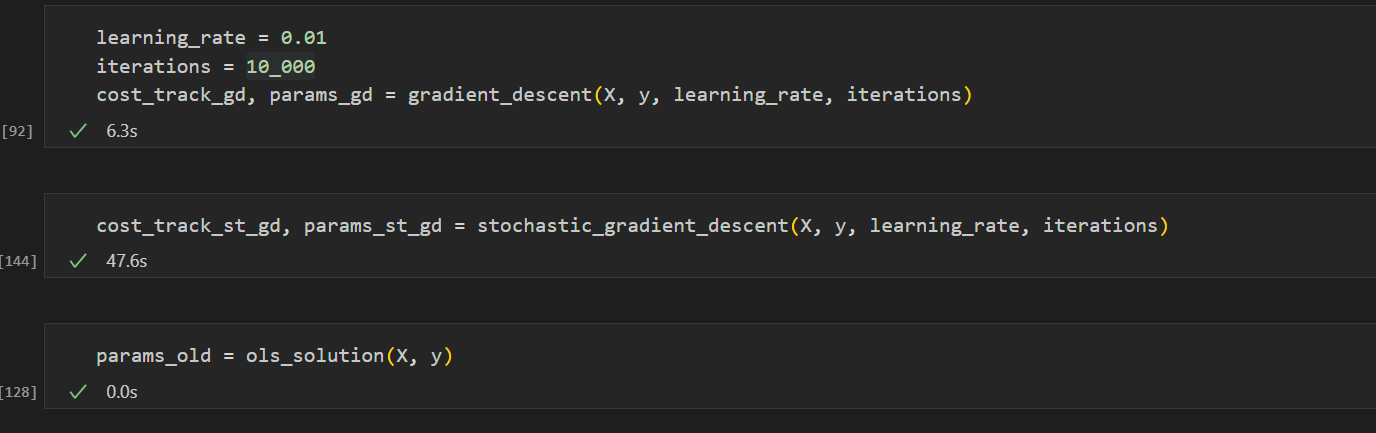

Понятно стохастику я реализовал на п****, тк он похорошему должен быть быстрее, тк за одну итерацию меньше вычислений должно быть. Значит долго по индексам проходится, тут нужно по-другому реализовывать.

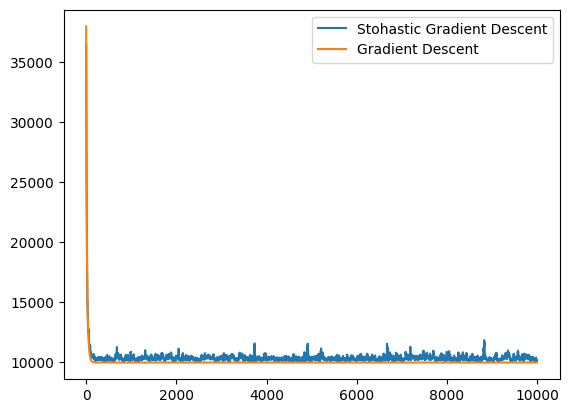

In [148]:
plt.plot(cost_track_st_gd, label='Stohastic Gradient Descent')
plt.plot(cost_track_gd, label='Gradient Descent')

plt.legend()
plt.plot();

Лучше всех справился GD 

## Задание 7 (1.5 балла).

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

In [8]:
def stochastic_l2_gradient_descent(X, y, learning_rate, iterations, lambda_, batch_size: int = 4):
    
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]
    inds = list(range(m))
    
    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        iter_indx = np.random.choice(inds, size=batch_size)
        params = params - 2./batch_size * learning_rate * (X[iter_indx].T @ ((X[iter_indx] @ params) - y[iter_indx]) + lambda_*params)
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

In [ ]:
from tqdm import tqdm

lambdas_ = np.linspace(0, 1, 11)
cost_tracks = []
params = []
for lambda_ in tqdm(lambdas_):
    cost_track, param = stochastic_l2_gradient_descent(X, y, learning_rate, iterations, lambda_)
    params += [param]
    cost_tracks += [cost_track]

100%|██████████| 11/11 [05:31<00:00, 30.16s/it]


In [ ]:
for param, lambda_ in zip(params, lambdas_):
    print(f'R2={r2_score(y, new_X @ param)}, labmda={lambda_}')

R2=0.7428417898438147, labmda=0.0
R2=0.743108312167872, labmda=0.1
R2=0.7522994124587703, labmda=0.2
R2=0.739225509452717, labmda=0.30000000000000004
R2=0.7410201438546804, labmda=0.4
R2=0.7454298827627556, labmda=0.5
R2=0.7358318083670419, labmda=0.6000000000000001
R2=0.7263822280135979, labmda=0.7000000000000001
R2=0.7401324130809142, labmda=0.8
R2=0.7300583586075873, labmda=0.9
R2=0.7291715566558007, labmda=1.0


Лучше всего с $\lambda = 0.2$, модель меньше переобучается. Так как мы тестируемся на трейновых же данных, то может меньше на выбросы реагирует, все же на мсе обучаемся

## Задание 8 (2 балла)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [11]:
def modified_grad_descent(X, y, learning_rate, iterations, alpha, batch_size: int = 4): # добавьте в аргументы также специфические для метода оптимизации гиперпараметры
    
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    v = np.copy(params)

    m = X.shape[0]
    inds = list(range(m))
    
    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        iter_indx = np.random.choice(inds, size=batch_size)
        grad = (X[iter_indx].T @ ((X[iter_indx] @ params) - y[iter_indx]))
        v = alpha*v + 2.0 * learning_rate / batch_size * grad 
        params -= v 
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params
    

In [12]:
learning_rate = 0.01
iterations = 10_000
alpha = 0.1
batch_size = 16

new_X = np.hstack((np.ones((X.shape[0], 1)), X))
cost_track_gd, params_gd = modified_grad_descent(X, y, learning_rate, iterations, alpha, batch_size)

In [15]:
from sklearn.metrics import r2_score
print(f'R2={r2_score(y, new_X @ params_gd)}, alpha={alpha}')

R2=0.75344934653199, alpha=0.1


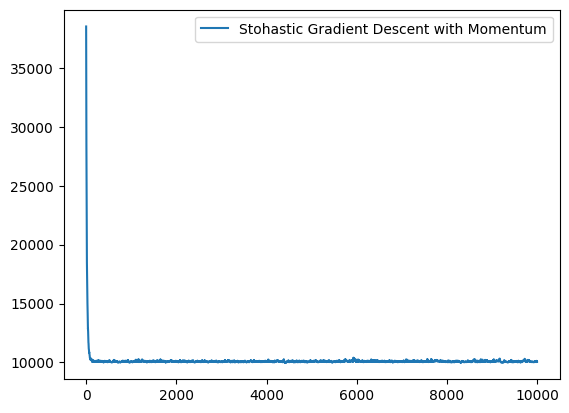

In [16]:
plt.plot(cost_track_gd, label='Stohastic Gradient Descent with Momentum')

plt.legend()
plt.plot();

## Бонус

## Задание 9 (0.5 балла)

Существует [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Известно, что методы второго порядка точнее, чем методы первого порядка (то есть те, которые используют только первую производную для оптимизации). Как вы думаете, почему в оптимизации функций потерь все формулы используют только производные первого порядка? Почему не используют метод Ньютона?

Да вычислительно дорого + функции потерь в многомерном пространстве параметров не особо гладкие, и как бы это колбасить будет так сильно, что сильного прироста от второго порядка нефакт, что получишь (может в локальный минимум свалишься), поэтому и не используют.

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/qxjz2tp)

Анриал угадать, но пусть будет Алёна Голубович